In [2]:
%load_ext lab_black

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!ls -lh /media/lucas/QS/l1_nnt/

total 14G
drwxrwxr-x 2 lucas lucas 4.0K May  2 19:44 binary
drwxrwxr-x 2 lucas lucas 4.0K May  2 19:44 binary10
drwxrwxr-x 2 lucas lucas  36K May  2 19:44 binary100
-rw-r--r-- 1 lucas lucas 2.2M May  2 19:39 mc_25k.pkl
-rw-rw-r-- 1 lucas lucas 3.0M May  2 19:44 mc_bin1.pkl
-rw-rw-r-- 1 lucas lucas 4.3M May  2 19:44 mc_bin2.pkl
-rw-rw-r-- 1 lucas lucas 3.2M May  2 19:44 mc_bin3.pkl
-rw-r--r-- 1 lucas lucas 5.4M May  2 19:39 mc.pkl
-rw-rw-r-- 1 lucas lucas 6.2K May  2 19:42 n_tracks.pdf
-rw-r--r-- 1 lucas lucas 4.9G May  2 19:39 OldKF_TTbar_170K_quality.root
-rw-rw-r-- 1 lucas lucas    0 May  2 19:44 pv_gen10.txt
-rwxrwxr-x 1 lucas lucas 2.4G May  2 19:42 PV.pickle
-rw-rw-r-- 1 lucas lucas  106 May  2 19:44 pv_truth10.txt
-rw-r--r-- 1 lucas lucas 128M May  2 19:39 tp_25k.pkl
-rw-rw-r-- 1 lucas lucas 272M May  2 19:42 tp_bin1.pkl
-rw-rw-r-- 1 lucas lucas 686M May  2 19:42 tp_bin2.pkl
-rw-rw-r-- 1 lucas lucas 475M May  2 19:43 tp_bin3.pkl
-rw-r--r-- 1 lucas lucas 1.2G May  2 19:39 tp.pkl
-

# PCA 1D 

We are going to do a 1D PCA to see if there is anything about the primary vertexing and how they cluster

In [6]:
trk = pd.read_pickle("/media/lucas/QS/l1_nnt/trk.pkl")

In [7]:
trk.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 40780722 entries, (0, 0) to (222975, 215)
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   trk_pt    float32
 1   trk_eta   float32
 2   trk_phi   float32
 3   trk_d0    float32
 4   trk_z0    float32
 5   trk_fake  int32  
dtypes: float32(5), int32(1)
memory usage: 1.1 GB


In [15]:
trk.dropna(inplace=True)

In [8]:
trk.head()

trk_pt   trk_eta   trk_phi  trk_d0    trk_z0  trk_fake
entry subentry                                                          
0     0         2.623967  1.301414 -0.289234   999.0 -0.878906         2
      1         3.435026  0.566814 -0.159267   999.0  3.339844         2
      2         3.774908  1.815973 -0.240375   999.0  4.921875         1
      3         2.641448 -1.435747 -0.128747   999.0 -0.468750         2
      4         2.320653  1.837421  0.032604   999.0  4.980469         1

In [9]:
from sklearn.decomposition import PCA

In [10]:
columns = ["trk_pt", "trk_eta", "trk_phi", "trk_z0"]

In [16]:
X = trk[columns].values

In [17]:
pca = PCA(n_components=1)

In [18]:
pca.fit(X)

PCA(n_components=1)

In [19]:
y = pca.transform(X)

In [20]:
y

array([[-1.0742031 ],
       [-0.2633794 ],
       [ 0.07640755],
       ...,
       [-1.0288229 ],
       [ 0.06927656],
       [-1.7097344 ]], dtype=float32)

In [21]:
trk["pca_1"] = y

In [22]:
trk["pca_1"]

entry   subentry
0       0          -1.074203
        1          -0.263379
        2           0.076408
        3          -1.056735
        4          -1.377847
                      ...   
222975  211        -1.653710
        212        -1.207241
        213        -1.028823
        214         0.069277
        215        -1.709734
Name: pca_1, Length: 40780640, dtype: float32

In [24]:
trk_25k = trk.query("entry<25000").copy()

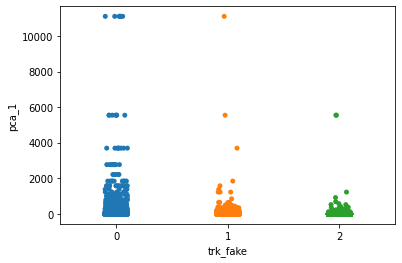

In [26]:
ax = sns.stripplot(x="trk_fake", y="pca_1", data=trk_25k)

There no clear separation between them. 

# 1D tSNE

let's try a 1D tSNE to see if there's some separation

In [27]:
from sklearn.manifold import TSNE

In [28]:
y_tsne = TSNE(n_components=1, learning_rate="auto", init="random").fit_transform(
    trk_25k[columns].values
)